# Tu primer árbol de decisión con scikit-learn

In [2]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [3]:
#Cargamos dataset a utilizar
df=pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

## Exploración de datos

In [4]:
#Visualizacion del DataFrame
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [5]:
#Eliminamos las columnas que no nos interesan
df.drop(columns=["Name","Fare"],inplace=True)

In [22]:
#Renombramos las columnas
df.rename(columns={"Siblings/Spouses Aboard":"SibSp","Parents/Children Aboard":"Parch"},inplace=True)

In [24]:
#Analizamos el shape del objeto
df.shape

(887, 6)

In [25]:
#Visualizamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   Parch     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB


In [26]:
#Cambiamos los tipos de datos
df=pd.get_dummies(df,columns=["Sex"],drop_first=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Age       887 non-null    float64
 3   SibSp     887 non-null    int64  
 4   Parch     887 non-null    int64  
 5   Sex_male  887 non-null    uint8  
dtypes: float64(1), int64(4), uint8(1)
memory usage: 35.6 KB


In [29]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [30]:
#Reemplazar el DataFrame
df.rename(columns={"Sex_male":"Sex"},inplace=True)

## Entrenamiento de árbol de decisión con scikit-learn

In [31]:
#Separamos en X e y
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [32]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#30% para test y 70% para train


In [33]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree=DecisionTreeClassifier(max_depth=2, random_state=42)


In [34]:
#Entrenamiento
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Evaluación del modelo

In [36]:
#Calculo de las predicciones en Train y Test
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

In [39]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

train_accuracy=accuracy_score(y_train,y_train_pred)

#Calculo el accuracy en Train

test_accuracy=accuracy_score(y_test,y_test_pred)
#Calculo el accuracy en Test

print(train_accuracy,test_accuracy)

0.8064516129032258 0.7378277153558053


Text(0.5, 1.0, 'Importancia de cada Feature')

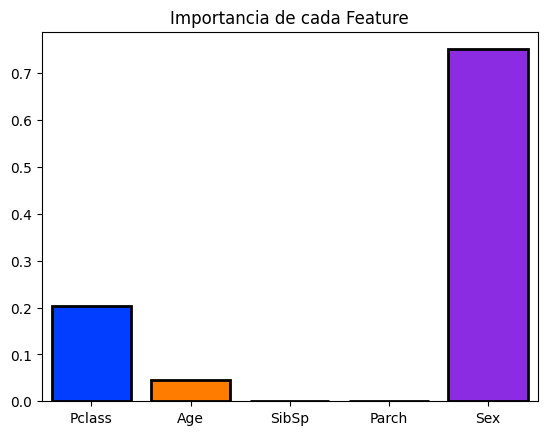

In [42]:
#Verificamos el feature importances
import seaborn as sns

impotances=tree.feature_importances_
columns=X.columns
sns.barplot(x=columns,y=impotances,palette='bright',saturation=2,edgecolor='black',linewidth=2)
plt.title("Importancia de cada Feature")

**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 